In [14]:
import pandas as pd
import numpy as np
from os import listdir
import cv2 # this package should be installed: was also required in the previous week's materials (look in that notebook for the install command)
                    # assuming this is installed by now, otherwise inside a cell type: !pip install opencv-python
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
dir_struct = '/content/drive/MyDrive/faces/'


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install opencv-python

In [15]:
class_names = ['No Hair', 'Thin Hair', 'Thick Hair','Invisible']

df  = pd.read_csv("/content/drive/MyDrive/MLProject/annotations.csv")
'''
print('Number of images: ', df.shape[0])
print('The proportion of glass labels: ')
# you may see equal proportion: logical since we have randomly assigned the label
df.groupby(['Glasses']).count()
'''
print(df)


                  image_name  wrinkles  freakles  glasses  hair_color  hair_top
0        emotionet_3_136.jpg       0.0       0.0      0.0         0.0       2.0
1        emotionet_3_144.jpg       0.0       0.0      0.0         6.0       2.0
2        emotionet_3_221.jpg       0.0       0.0      0.0         1.0       2.0
3        emotionet_3_282.jpg       0.0       0.0      0.0         2.0       1.0
4        emotionet_3_370.jpg       0.0       0.0      0.0         3.0       1.0
...                      ...       ...       ...      ...         ...       ...
1886  emotionet_3_263230.jpg       1.0       0.0      1.0         3.0       3.0
1887  emotionet_3_263314.jpg       0.0       0.0      0.0         1.0       3.0
1888  emotionet_3_263361.jpg       0.0       0.0      0.0         3.0       2.0
1889  emotionet_3_263366.jpg       0.0       0.0      0.0         1.0       2.0
1890  emotionet_3_263417.jpg       1.0       0.0      0.0         1.0       1.0

[1891 rows x 6 columns]


**Resizing and Data prepertion**

In [16]:
import os.path
hairtop_data=df
#glasses_labels.assign(new_col = dataset_images)
image_lst = [] # this list will hold all the images
#for i in range(glasses_labels.shape[0]): # read the image one by on
image_lst=hairtop_data['image_name']
hairtop_data=hairtop_data.drop(columns=["wrinkles","freakles", "glasses","hair_color"])
print(hairtop_data)

count=0
image_lst2=[]
for i in range(len(image_lst)):
  path=hairtop_data.iloc[i]['image_name']
  path=dir_struct+path
  print(path)
  count=count+1
  if os.path.isfile(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (50,75), interpolation = cv2.INTER_AREA) # resizing all images to 32x32: NOT ideal but need to be uniform in order to apply the algorithm                                                                                         # this actually ensures all the features [pixel values] will be of same size
    image_lst2.append(image) # appending the read image to a list
  else :
    image_lst2.append("Empty")


print(count)



                  image_name  hair_top
0        emotionet_3_136.jpg       2.0
1        emotionet_3_144.jpg       2.0
2        emotionet_3_221.jpg       2.0
3        emotionet_3_282.jpg       1.0
4        emotionet_3_370.jpg       1.0
...                      ...       ...
1886  emotionet_3_263230.jpg       3.0
1887  emotionet_3_263314.jpg       3.0
1888  emotionet_3_263361.jpg       2.0
1889  emotionet_3_263366.jpg       2.0
1890  emotionet_3_263417.jpg       1.0

[1891 rows x 2 columns]
/content/drive/MyDrive/faces/emotionet_3_136.jpg
/content/drive/MyDrive/faces/emotionet_3_144.jpg
/content/drive/MyDrive/faces/emotionet_3_221.jpg
/content/drive/MyDrive/faces/emotionet_3_282.jpg
/content/drive/MyDrive/faces/emotionet_3_370.jpg
/content/drive/MyDrive/faces/emotionet_3_401.jpg
/content/drive/MyDrive/faces/emotionet_3_473.jpg
/content/drive/MyDrive/faces/emotionet_3_474.jpg
/content/drive/MyDrive/faces/emotionet_3_525.jpg
/content/drive/MyDrive/faces/emotionet_3_559.jpg
/content/drive/My

In [17]:
hairtop_data['image'] = image_lst2

In [18]:
hairtop_data

,image_name,hair_top,image
0,emotionet_3_136.jpg,2.0,"[[[162, 133, 100], [154, 115, 132], [163, 124,..."
1,emotionet_3_144.jpg,2.0,"[[[60, 62, 58], [58, 59, 56], [65, 67, 64], [7..."
2,emotionet_3_221.jpg,2.0,"[[[74, 59, 61], [63, 50, 54], [55, 44, 47], [4..."
3,emotionet_3_282.jpg,1.0,"[[[94, 66, 59], [21, 14, 14], [27, 16, 17], [2..."
4,emotionet_3_370.jpg,1.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...
1886,emotionet_3_263230.jpg,3.0,"[[[46, 74, 121], [46, 73, 119], [41, 67, 110],..."
1887,emotionet_3_263314.jpg,3.0,"[[[32, 46, 32], [30, 35, 25], [19, 21, 14], [1..."
1888,emotionet_3_263361.jpg,2.0,"[[[74, 73, 69], [74, 73, 69], [74, 73, 69], [7..."
1889,emotionet_3_263366.jpg,2.0,"[[[227, 226, 232], [227, 226, 232], [226, 225,..."


**Cleaning Data**

**Row 527 has a corrupted image I want to drop before starting, it has Empty value from the previous code**

In [19]:
#print(glasses_data[glasses_data['image'] =="Empty"])
#print(glasses_data)
#Delete the image that does not exist
#df = df.drop(df[df.score < 50].index)
#print (glasses_data.loc[haircolor_data.image=="empty"])
hairtop_data= hairtop_data.drop([527])
#print(glasses_data[glasses_data['image'] =="Empty"])
# 

**Remove empty**

In [20]:
hairtop_data=hairtop_data.dropna()
print(hairtop_data.isna().sum().sum())

0


In [21]:
hairtop_data

,image_name,hair_top,image
0,emotionet_3_136.jpg,2.0,"[[[162, 133, 100], [154, 115, 132], [163, 124,..."
1,emotionet_3_144.jpg,2.0,"[[[60, 62, 58], [58, 59, 56], [65, 67, 64], [7..."
2,emotionet_3_221.jpg,2.0,"[[[74, 59, 61], [63, 50, 54], [55, 44, 47], [4..."
3,emotionet_3_282.jpg,1.0,"[[[94, 66, 59], [21, 14, 14], [27, 16, 17], [2..."
4,emotionet_3_370.jpg,1.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...
1886,emotionet_3_263230.jpg,3.0,"[[[46, 74, 121], [46, 73, 119], [41, 67, 110],..."
1887,emotionet_3_263314.jpg,3.0,"[[[32, 46, 32], [30, 35, 25], [19, 21, 14], [1..."
1888,emotionet_3_263361.jpg,2.0,"[[[74, 73, 69], [74, 73, 69], [74, 73, 69], [7..."
1889,emotionet_3_263366.jpg,2.0,"[[[227, 226, 232], [227, 226, 232], [226, 225,..."


**Convert to numpy array**

In [23]:
#train_array=np.zeros((1509,150,100, 3))
#test_array=np.zeros((387,150,100, 3))

all_images=np.zeros((1887,
                     75,50,3))
#print(glasses_data.iloc[1]['image'].shape)


for i in range(len(hairtop_data)):
  all_images[i]=hairtop_data.iloc[i]['image']





In [24]:
print(all_images.shape)

(1887, 75, 50, 3)


**Splitting Images**

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [27]:
labels=hairtop_data.drop(columns=["image","image_name"])


In [28]:
labels=labels.to_numpy()

In [59]:
train, test,train_labels, test_labels = train_test_split(all_images,labels, test_size=0.20, random_state=42, stratify=labels)

In [30]:
print(f'Shape of the training data: {train.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test.shape}')
print(f'Shape of the test target: {test_labels.shape}')

Shape of the training data: (1509, 75, 50, 3)
Shape of the training target: (1509, 1)
Shape of the test data: (378, 75, 50, 3)
Shape of the test target: (378, 1)


In [50]:
np.histogram(train_labels, bins=3, range=None, normed=None, weights=None, density=None) 

(array([611, 633, 265]),
 array([0.        , 1.33333333, 2.66666667, 4.        ]))

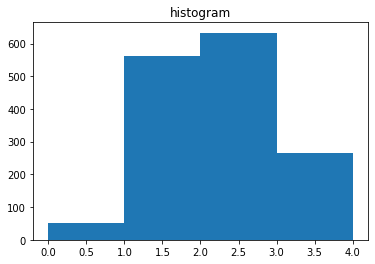

In [75]:
plt.hist(train_labels, bins = 4) 
plt.title("histogram") 
plt.show()

**Augmentation**

In [95]:
	# example of horizontal shift image augmentation
#print((test[0]))
count=0
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
train_set=train
array_length=len(train_set)

for i in range(len(train_set)):
  
  data=train[i]
  #print(data)
  data_label=int(train_labels[i])
  if (data_label==3):
    count=count+1;
# expand dimension to one sample
    samples = expand_dims(data, 0)
    datagen=ImageDataGenerator(brightness_range=[0.2,1.0])
#horizontal_flip=True
#brightness_range=[0.2,1.0]
#brightness_range=[0.5,2.0]
#zoom_range=.3
#width_shift_range=12.0

# prepare iterator
    it = datagen.flow(samples, batch_size=1)
    batch = it.next()
    image = batch[0].astype('uint8')
    print(image)
    #print(image)
    #plt.imshow(image)
    #pos=(array_length-1)+count
    #np.append(train[pos],image,axis=0)
    #np.append(train_labels[pos],train_labels[i],axis=0)

    image=image.reshape((1,75, 50, 3))
   
    image_label=(train_labels[i]).reshape(1,1)
    #add the image to the train images
    train=np.append(train,image,axis=0)

    #add the lable to the train label
    train_labels=np.append(train_labels,image_label,axis=0)
    
print(count)

  #plt.imshow(image)
  #print(data_label)

Streaming output truncated to the last 5000 lines.
  [102  85  88]]]
[[[ 1  1  0]
  [ 2  2  2]
  [ 2  3  2]
  ...
  [ 5  6  4]
  [ 5  6  4]
  [ 5  6  4]]

 [[ 2  3  1]
  [ 2  2  1]
  [ 3  4  2]
  ...
  [ 5  6  3]
  [ 5  6  3]
  [ 5  6  3]]

 [[ 3  3  1]
  [ 2  3  1]
  [ 7  6  4]
  ...
  [ 6  6  4]
  [ 6  6  4]
  [ 6  6  4]]

 ...

 [[ 2  2  0]
  [ 5  6  4]
  [ 2  2  0]
  ...
  [87 68 54]
  [87 68 54]
  [87 68 54]]

 [[ 3  3  1]
  [ 4  4  3]
  [ 2  2  0]
  ...
  [87 68 54]
  [87 68 54]
  [87 68 54]]

 [[ 3  3  1]
  [ 4  5  3]
  [ 2  3  0]
  ...
  [88 69 55]
  [88 69 55]
  [88 69 55]]]
[[[121 117 112]
  [121 117 112]
  [121 118 111]
  ...
  [115 111 105]
  [115 111 105]
  [115 111 105]]

 [[121 117 112]
  [121 117 112]
  [121 118 112]
  ...
  [115 111 105]
  [115 111 105]
  [115 111 105]]

 [[121 117 112]
  [121 117 112]
  [121 118 112]
  ...
  [116 112 106]
  [116 112 106]
  [116 112 106]]

 ...

 [[125 123 121]
  [126 126 127]
  [127 125 127]
  ...
  [ 79  74  73]
  [ 79  74  73]
  [ 7

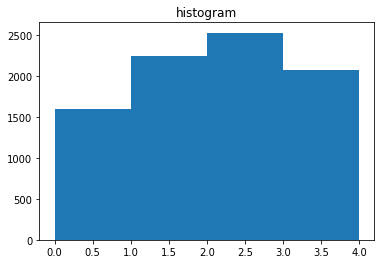

In [96]:
plt.hist(train_labels, bins = 4) 
plt.title("histogram") 
plt.show()

In [98]:
print(len(train))

8447


**Normalization**

In [99]:
train_images, test_images = train / 255.0, test / 255.0

**Creating VGGA 16**

In [125]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", input_shape=(75,50,3)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))  ## END BLOCK 1
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))   ## END BLOCK 2
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 3 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 4 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 5 
model.add(layers.Flatten())    ## converting to vector 
model.add(layers.Dense(4096, activation="relu"))    ## 1st FC layer 
model.add(layers.Dense(4096, activation="relu"))    ## 2st FC layer 
model.add(layers.Dense(10, activation="softmax"))    ## output layer 




model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 75, 50, 64)        1792      
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 75, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 37, 25, 64)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 37, 25, 128)       73856     
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 37, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 18, 12, 128)       0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 18, 12, 256)     

**VGG16 SAVE AND TRAIN**

Epoch 1/10
32/32 [==============================] - 10s 324ms/step - loss: 1.3781 - accuracy: 0.2913 - val_loss: 1.4244 - val_accuracy: 0.1693

Epoch 00001: saving model to /content/drive/MyDrive/MLProject/hairtop_models/VGG1616-01-0.1693.h5
Epoch 2/10
32/32 [==============================] - 11s 330ms/step - loss: 1.3301 - accuracy: 0.3276 - val_loss: 1.2577 - val_accuracy: 0.3677

Epoch 00002: saving model to /content/drive/MyDrive/MLProject/hairtop_models/VGG1616-02-0.3677.h5
Epoch 3/10
32/32 [==============================] - 11s 327ms/step - loss: 1.2126 - accuracy: 0.4216 - val_loss: 1.2097 - val_accuracy: 0.4735

Epoch 00003: saving model to /content/drive/MyDrive/MLProject/hairtop_models/VGG1616-03-0.4735.h5
Epoch 4/10
32/32 [==============================] - 10s 323ms/step - loss: 1.0486 - accuracy: 0.5300 - val_loss: 1.1301 - val_accuracy: 0.5079

Epoch 00004: saving model to /content/drive/MyDrive/MLProject/hairtop_models/VGG1616-04-0.5079.h5
Epoch 5/10
32/32 [==============

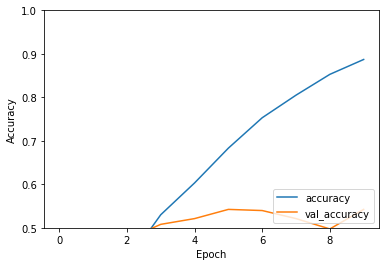

In [127]:
from keras.callbacks import ModelCheckpoint
# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "/content/drive/MyDrive/MLProject/hairtop_models/VGG1616-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]

# initialize the number of epochs and batch size
EPOCHS = 10
BS = 256
# train the network
history = model.fit(train_images, train_labels, shuffle= True,
	validation_data=(test_images, test_labels), steps_per_epoch=len(train_images) // BS,
	epochs=EPOCHS, callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#75, 50, 3

In [64]:
print(len(train_labels))

1509


**Evaluation Table**

In [128]:
#from keras.models import load_model

# here you need to specify the saved model from before
#filepath = "/content/ResNet-02-0.1784.h5"

# load the model
#new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)

print('confusion Matrix :')
print(confusion_matrix(test_labels,y_pred))

print(classification_report(test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(test_labels, y_pred , average="macro"))
print(recall_score(test_labels, y_pred , average="macro"))

print(f1_score(test_labels, y_pred , average="macro"))
print(f1_score(test_labels, y_pred , average="micro"))
print(f1_score(test_labels, y_pred , average="weighted"))



confusion Matrix :
[[  1   9   1   1   0]
 [  1 105  21  14   0]
 [  1  79  68  11   0]
 [  0  23  10  31   0]
 [  1   0   0   1   0]]
              precision    recall  f1-score   support

         0.0       0.25      0.08      0.12        12
         1.0       0.49      0.74      0.59       141
         2.0       0.68      0.43      0.53       159
         3.0       0.53      0.48      0.51        64
         4.0       0.00      0.00      0.00         2

    accuracy                           0.54       378
   macro avg       0.39      0.35      0.35       378
weighted avg       0.57      0.54      0.53       378

0.3901187739463602
0.3480124280744012
0.3493057081051295
0.5423280423280423
0.5303071802245243


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**image prediction**

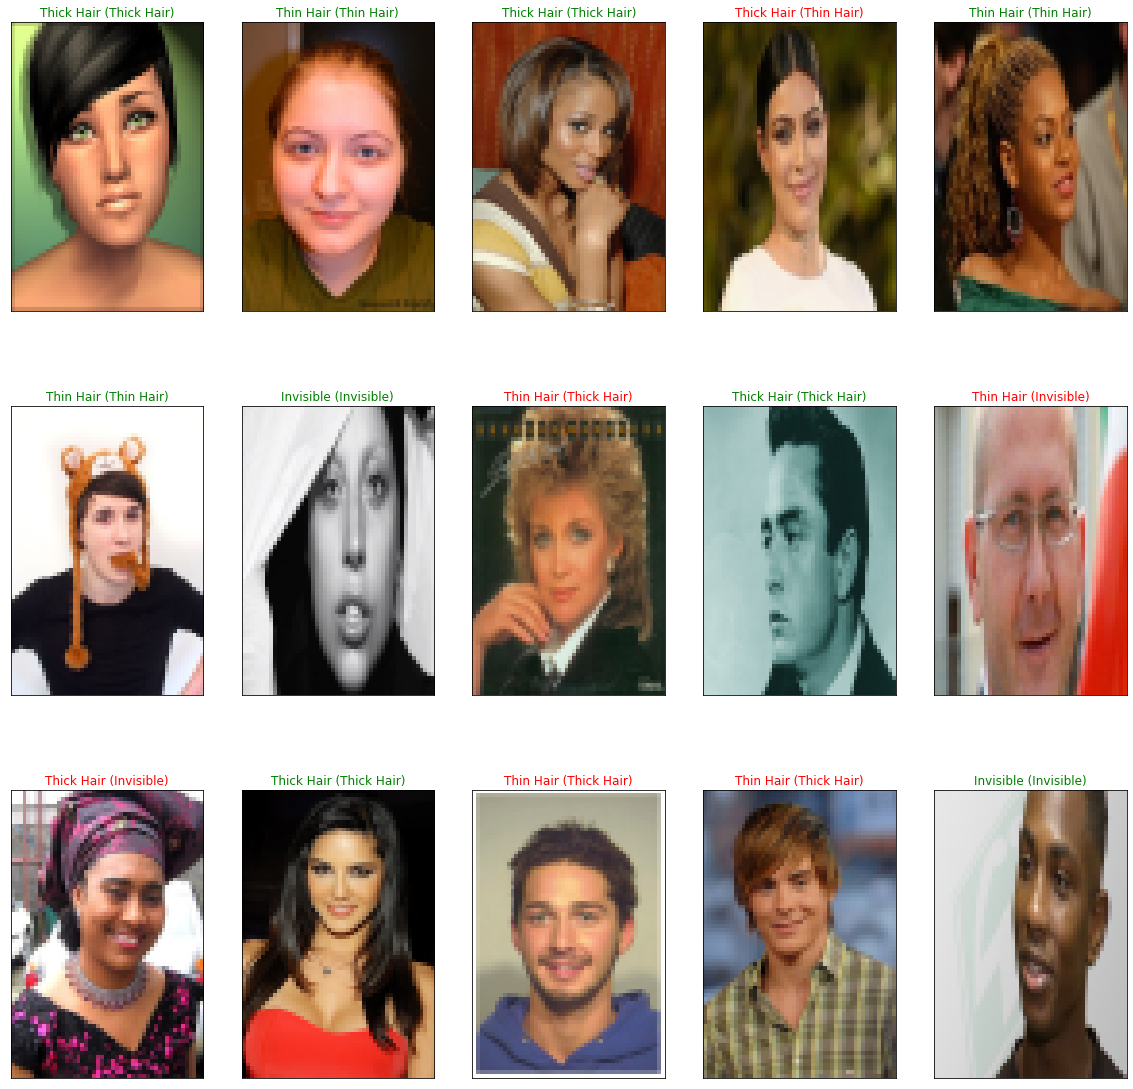

In [129]:
import pdb
y_hat = model.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    ax.imshow(np.squeeze(test_images[index]))
     
   # true_index=1
    #Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

**Using the built-in Keras code and weights of ResNet**

In [134]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
out_classes = 4
# load model without classifier layers
model2 = ResNet50(include_top=False, weights="imagenet", input_shape=(75, 50, 3)) 
   #/content/drive/MyDrive/MLProject/hairtop_models/ 

# add new classifier layers
flat1 = layers.Flatten()(model2.layers[-1].output)
output = layers.Dense(out_classes, activation='softmax')(flat1)


# define new model
model2 = Model(inputs=model2.inputs, outputs=output)

model2.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




In [131]:
model2.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 75, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 81, 56, 3)    0           input_18[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 38, 25, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 38, 25, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

**Train Resnet**

In [ ]:
from keras.callbacks import ModelCheckpoint
# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "/content/drive/MyDrive/MLProject/hairtop_models/VGG1616-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]

# initialize the number of epochs and batch size
EPOCHS = 10
BS = 256
# train the network
history = model2.fit(train_images, train_labels, shuffle= True,
	validation_data=(test_images, test_labels), steps_per_epoch=len(train_images) // BS,
	epochs=EPOCHS, callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#75, 50, 3

Epoch 1/10
32/32 [==============================] - 16s 339ms/step - loss: nan - accuracy: 0.3713 - val_loss: nan - val_accuracy: 0.0317

Epoch 00001: saving model to /content/drive/MyDrive/MLProject/hairtop_models/VGG1616-01-0.0317.h5
Epoch 2/10
32/32 [==============================] - 10s 307ms/step - loss: nan - accuracy: 0.1919 - val_loss: nan - val_accuracy: 0.0317

Epoch 00002: saving model to /content/drive/MyDrive/MLProject/hairtop_models/VGG1616-02-0.0317.h5
Epoch 3/10
32/32 [==============================] - 10s 310ms/step - loss: nan - accuracy: 0.1801 - val_loss: nan - val_accuracy: 0.0317

Epoch 00003: saving model to /content/drive/MyDrive/MLProject/hairtop_models/VGG1616-03-0.0317.h5
Epoch 4/10
32/32 [==============================] - 10s 312ms/step - loss: nan - accuracy: 0.1949 - val_loss: nan - val_accuracy: 0.0317

Epoch 00004: saving model to /content/drive/MyDrive/MLProject/hairtop_models/VGG1616-04-0.0317.h5
Epoch 5/10
32/32 [==============================] - 10s 

**Predictions**

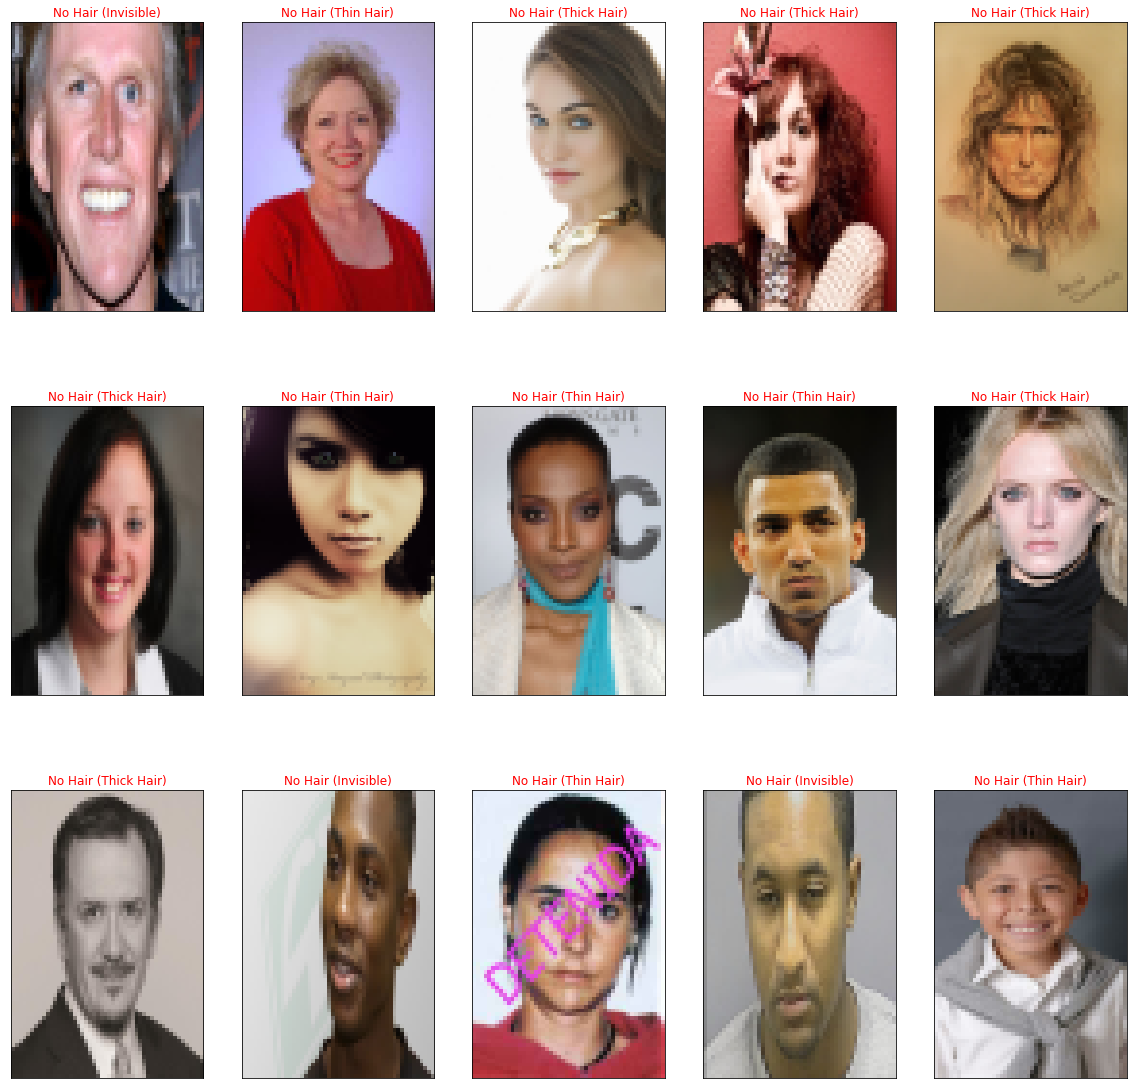

In [72]:
import pdb
y_hat = model2.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    ax.imshow(np.squeeze(test_images[index]))
     
   # true_index=1
    #Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

**Evaluation**

In [74]:
#from keras.models import load_model

# here you need to specify the saved model from before
#filepath = "/content/ResNet-02-0.1784.h5"

# load the model
#new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred1 = model2.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)

print('confusion Matrix :')
print(confusion_matrix(test_labels,y_pred))

print(classification_report(test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(test_labels, y_pred , average="macro"))
print(recall_score(test_labels, y_pred , average="macro"))

print(f1_score(test_labels, y_pred , average="macro"))
print(f1_score(test_labels, y_pred , average="micro"))
print(f1_score(test_labels, y_pred , average="weighted"))



confusion Matrix :
[[ 12   0   0   0   0]
 [141   0   0   0   0]
 [159   0   0   0   0]
 [ 64   0   0   0   0]
 [  2   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.03      1.00      0.06        12
         1.0       0.00      0.00      0.00       141
         2.0       0.00      0.00      0.00       159
         3.0       0.00      0.00      0.00        64
         4.0       0.00      0.00      0.00         2

    accuracy                           0.03       378
   macro avg       0.01      0.20      0.01       378
weighted avg       0.00      0.03      0.00       378

0.006349206349206349
0.2
0.012307692307692308
0.031746031746031744
0.0019536019536019536


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
glasses_data['glasses'].hist()

**Features Map**

In [ ]:
from numpy import expand_dims
from keras.models import Model

# redefine model to output right after the first conv layer
model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)   ### here you need to select only conv or pooling layers; the index should always start from 1; index 0 corresponds to the input layer
model1.summary()
# load the image with the required shape
img = test_images[0]   ### if you want change the index here to load another image from the test/training set
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first conv layer
feature_maps = model1.predict(img)
# plot all 64 maps in 8x8 squares   
### square1 times square2 should always be the number of output feature maps of the layer 
### (in other words should be the last number of the 'output shape' column of the model summary)
square1 = 8
square2 = 8
ix = 1

# Display the input image
plt.imshow(img[0])


figure = plt.figure(figsize=(20, 20))
for _ in range(square1):
	for _ in range(square2):
		ax = figure.add_subplot(square1, square2, ix, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()